In [ ]:
#Exploranatory Data Analysis
# Prep Steps 
#1 Import packages (numpy pandas matplot and seaborn)
#2 Reading datafile to dataframe
#3 Exploring columns, type (category vs measure), shape
#4 Checking summaries and descriptive stats (avg; std)
#5 Dropping/Renaming columns  (ds as x-axis for time-series)
#6 Removing duplicates
#7 Removing missing values (null or NaN)
#8 Removing outliers (anomaly)
#
# Visual Analyis Steps
#1 Correlation (heatmap : hot means high correlation between two variables)
#2 Bar chart and histogram
# Credit : Thanks to FORMASYS https://youtu.be/KDzUozgLyCI

In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# open movie db file
df=pd.read_csv('tmdb_movies_data.csv')
df_backup = pd.read_csv('tmdb_movies_data.csv')

In [4]:
# first few lines 
df.head

<bound method NDFrame.head of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                 

In [5]:
# last few lines
df.tail

<bound method NDFrame.tail of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                 

In [6]:
# shape of the dataframe (size)
df.shape

(10866, 21)

In [7]:
# check datatype of every column
# object : category
# int or float : measures
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# few stats
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Data cleansing

In [9]:
# check count of duplicates
df.duplicated().sum()

1

In [10]:
# remove duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()
# no more duplicate row

0

In [11]:
# check the Null values by feature
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
# features description
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [13]:
# features selection/suppression
#Make the suppression repeatable
df=df_backup.copy()
deleted_cols=(['id', 'imdb_id',  'budget', 'revenue', 
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime',  'production_companies', 'release_date'])
df.drop(deleted_cols,axis=1, inplace=True)
df.head()

,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,Furious 7,Action|Crime|Thriller,2947,7.3,2015,174799923.1,1.385749e+09


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   genres          10843 non-null  object 
 3   vote_count      10866 non-null  int64  
 4   vote_average    10866 non-null  float64
 5   release_year    10866 non-null  int64  
 6   budget_adj      10866 non-null  float64
 7   revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 679.2+ KB


In [15]:
df_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   genres          10843 non-null  object 
 3   vote_count      10866 non-null  int64  
 4   vote_average    10866 non-null  float64
 5   release_year    10866 non-null  int64  
 6   budget_adj      10866 non-null  float64
 7   revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 679.2+ KB


In [17]:
df.columns

Index(['popularity', 'original_title', 'genres', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [18]:
df.isnull().sum()

popularity         0
original_title     0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [19]:
# Suppress null rows
df.dropna(inplace=True)
# check again null row (should be none)
df.isnull().sum()

popularity        0
original_title    0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [20]:
df.shape

(10843, 8)

EDA (Explorer Data Analysis)

In [21]:
# Keep the main genre
list_genre=[]
for i in df['genres']:
  i=i.split('|') # genres delimitator
  list_genre.append(i[0]) # keep the main genre
# append the list (genre) into df
df['genres_adj'] = list_genre
df.info

<bound method DataFrame.info of        popularity                original_title  \
0       32.985763                Jurassic World   
1       28.419936            Mad Max: Fury Road   
2       13.112507                     Insurgent   
3       11.173104  Star Wars: The Force Awakens   
4        9.335014                     Furious 7   
...           ...                           ...   
10861    0.080598            The Endless Summer   
10862    0.065543                    Grand Prix   
10863    0.065141           Beregis Avtomobilya   
10864    0.064317        What's Up, Tiger Lily?   
10865    0.035919      Manos: The Hands of Fate   

                                          genres  vote_count  vote_average  \
0      Action|Adventure|Science Fiction|Thriller        5562           6.5   
1      Action|Adventure|Science Fiction|Thriller        6185           7.1   
2             Adventure|Science Fiction|Thriller        2480           6.3   
3       Action|Adventure|Science Fiction|Fa

In [22]:
df['revenue_adj'].mean()

51473316.52761116

In [23]:
df['budget_adj'].mean()

17588266.220953114

In [24]:
df['vote_average'].mean()

5.973973992437535

In [25]:
df['vote_average'].unique()

array([6.5, 7.1, 6.3, 7.5, 7.3, 7.2, 5.8, 7.6, 8. , 6.2, 5.2, 7.4, 6.1,
       7. , 6.8, 5.3, 7.8, 6.4, 6.6, 7.7, 5.6, 6.9, 5.9, 6.7, 5.5, 5. ,
       4.4, 5.4, 5.1, 4.8, 5.7, 4.1, 3.9, 4.5, 6. , 4.2, 3.6, 4.3, 4.9,
       4.7, 4. , 3.5, 3.8, 3.3, 3.7, 4.6, 7.9, 8.2, 2.6, 3.1, 8.9, 3.2,
       2.4, 8.4, 3. , 2.8, 3.4, 8.8, 8.1, 8.3, 2.7, 2.5, 2.1, 8.6, 2.9,
       8.5, 9.2, 2.2, 2. , 8.7, 2.3, 1.5])

In [26]:
df['genres_adj'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [27]:
df['genres_adj'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               381
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres_adj, dtype: int64

Univariate analysis (single variable)

<AxesSubplot:ylabel='Frequency'>

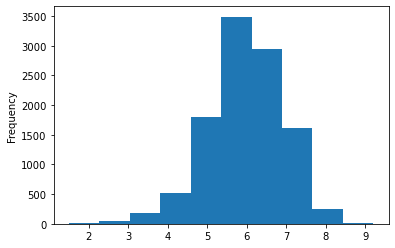

In [28]:
# Build histogram of vote_average
df['vote_average'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

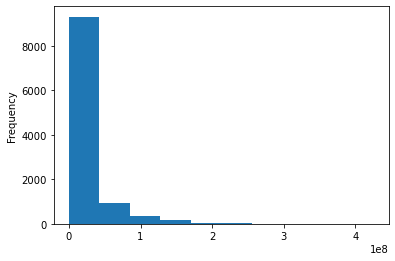

In [29]:
# Build histogram of Budget
df['budget_adj'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

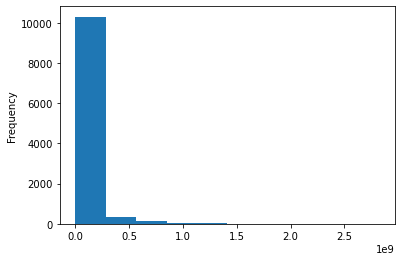

In [30]:
# Build histogram of Revenue
df['revenue_adj'].plot(kind='hist')

Multivariate analysis (two or more variables)

<AxesSubplot:>

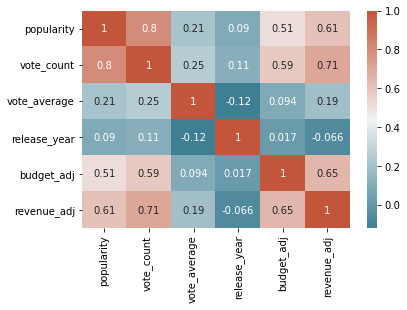

In [32]:
# check the correlation of two variables
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,annot=True, cmap=sns.diverging_palette(220,20,as_cmap=True))
# warm color : hot/orange means high correlation between 2 variables (budget vs revenue = 0.65)

<AxesSubplot:xlabel='budget_adj', ylabel='revenue_adj'>

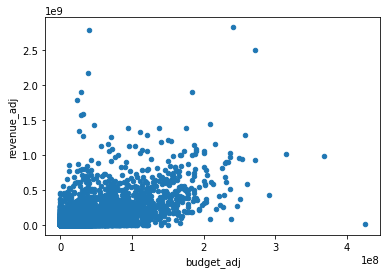

In [33]:
# Plot with pandas dataframe
df.plot(kind='scatter', x='budget_adj', y='revenue_adj')

<AxesSubplot:xlabel='vote_count', ylabel='revenue_adj'>

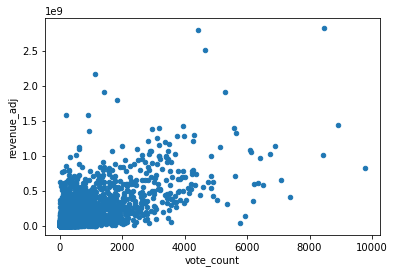

In [34]:
df.plot(kind='scatter', x='vote_count', y='revenue_adj')

<AxesSubplot:xlabel='vote_average', ylabel='revenue_adj'>

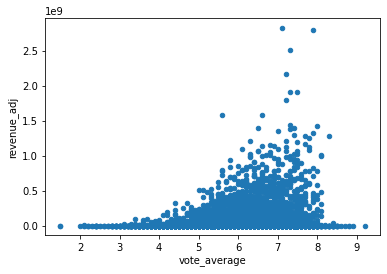

In [35]:
df.plot(kind='scatter', x='vote_average', y='revenue_adj')

Q1 : what is the genre of movies which has got biggest revenue

In [36]:
# avg of revenue by genre 
df_genre_rev=df.groupby(['genres_adj'])['revenue_adj'].mean()

In [37]:
# sorted by revenue
df_genre_rev.sort_values(ascending=False)

genres_adj
Adventure          1.665356e+08
Science Fiction    9.951810e+07
Fantasy            8.283760e+07
Family             7.724863e+07
Animation          7.671443e+07
Action             7.401006e+07
History            6.536195e+07
War                4.874310e+07
Western            4.730739e+07
Romance            4.721514e+07
Crime              4.674641e+07
Comedy             3.837766e+07
Music              3.807907e+07
Drama              3.578622e+07
Thriller           3.096924e+07
Mystery            3.002289e+07
Horror             2.417979e+07
Documentary        2.150125e+06
TV Movie           7.485782e+05
Foreign            0.000000e+00
Name: revenue_adj, dtype: float64

<AxesSubplot:xlabel='genres_adj'>

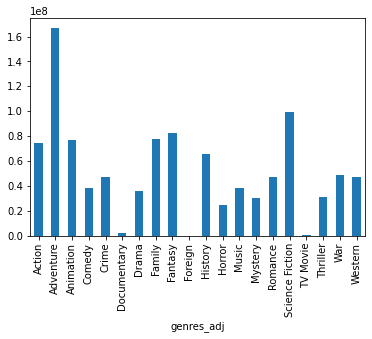

In [38]:
# Plot the bar chart
df_genre_rev.plot(kind='bar')